In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

indeed = pd.read_csv('/content/Indeed_Reviews.csv')

In [25]:
#Show the first 4 rows of the data
indeed.head(4)

,Company,Overall,Work/life balance,Compensation/benefits,Job security/advancement,Management,Culture,Title,Job,Date,Review,Pros,Cons
0,Taco Bell,3,3,1,3,5,3,Job is a job,Team Trainer,10-Feb-18,Nothing special about this job. Regular thankl...,its a job,pay
1,United States Postal Service,4,5,3,5,5,5,Fun and energentic,letter carrier,10-Feb-18,The post office was a fun place to work. We al...,NaN,NaN
2,KFC,5,4,3,4,4,4,General Management,Assistant General Manager,10-Feb-18,I always monitor our Store whenever we are on ...,NaN,NaN
3,Taco Bell,4,4,4,4,4,4,very easy,Fast Food Cashier,10-Feb-18,i learned how to speak to and handle customers...,sometimes free lunch,"short breaks, low hours"


In [26]:
#Check whether each column contains null value and/or non-values
indeed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Company                   200000 non-null  object
 1   Overall                   200000 non-null  int64 
 2   Work/life balance         200000 non-null  int64 
 3   Compensation/benefits     200000 non-null  int64 
 4   Job security/advancement  200000 non-null  int64 
 5   Management                200000 non-null  int64 
 6   Culture                   200000 non-null  int64 
 7   Title                     199671 non-null  object
 8   Job                       199929 non-null  object
 9   Date                      200000 non-null  object
 10  Review                    200000 non-null  object
 11  Pros                      112393 non-null  object
 12  Cons                      107432 non-null  object
dtypes: int64(6), object(7)
memory usage: 19.8+ MB


In [27]:
#Convert Date object into datetime integer
#Check whether your Date object converted to dtype('<M8[ns]')
indeed["Date"] = pd.to_datetime(indeed["Date"])
indeed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Company                   200000 non-null  object        
 1   Overall                   200000 non-null  int64         
 2   Work/life balance         200000 non-null  int64         
 3   Compensation/benefits     200000 non-null  int64         
 4   Job security/advancement  200000 non-null  int64         
 5   Management                200000 non-null  int64         
 6   Culture                   200000 non-null  int64         
 7   Title                     199671 non-null  object        
 8   Job                       199929 non-null  object        
 9   Date                      200000 non-null  datetime64[ns]
 10  Review                    200000 non-null  object        
 11  Pros                      112393 non-null  object        
 12  Co

In [28]:
#Create a new column "Year" by only extracting the year 
#information from the "Date" column
indeed["Year"] = pd.DatetimeIndex(indeed['Date']).year

In [29]:
indeed.head(2)

,Company,Overall,Work/life balance,Compensation/benefits,Job security/advancement,Management,Culture,Title,Job,Date,Review,Pros,Cons,Year
0,Taco Bell,3,3,1,3,5,3,Job is a job,Team Trainer,2018-02-10,Nothing special about this job. Regular thankl...,its a job,pay,2018
1,United States Postal Service,4,5,3,5,5,5,Fun and energentic,letter carrier,2018-02-10,The post office was a fun place to work. We al...,NaN,NaN,2018


In [30]:
#Creating function for polarity and subjectivity
def detect_polarity(text):
    
    #Converts the text into textblob object and then retuns
    #the polarity.
    blob = TextBlob(text)
    
    # return the polarity
    return blob.sentiment.polarity
  

def detect_subjectivity(text):
    
    #Converts the text into textblob object and then retuns
    #the polarity.
    blob = TextBlob(text)
    
    # return the polarity
    return blob.sentiment.subjectivity



In [31]:
#Run the sentiment anlysis on the text under the "Review" column
#Create two new columns for "polarity" and "subjectivity"
from textblob import TextBlob

# create new columns for polarity and subjectivity of the reviews

indeed['polarity'] = indeed.Review.apply(detect_polarity)
indeed['subjectivity'] = indeed.Review.apply(detect_subjectivity)

In [32]:
indeed.head(1)

,Company,Overall,Work/life balance,Compensation/benefits,Job security/advancement,Management,Culture,Title,Job,Date,Review,Pros,Cons,Year,polarity,subjectivity
0,Taco Bell,3,3,1,3,5,3,Job is a job,Team Trainer,2018-02-10,Nothing special about this job. Regular thankl...,its a job,pay,2018,0.177056,0.602174


<BarContainer object of 7 artists>

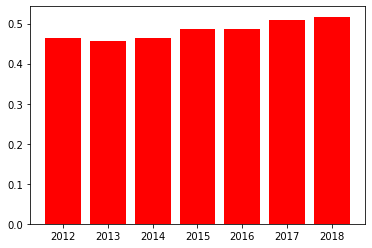

In [33]:
#Plot the histogram for displaying the distribution of subjectivity across years
yearly = indeed.groupby('Year')['subjectivity'].mean()
yearly
plt.bar(yearly.index, yearly, color = 'red')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


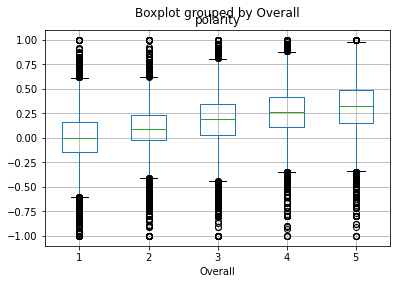

In [34]:
#Plot boxplot for polarity grouped by Overall ratings
indeed.boxplot('polarity', by='Overall')

In [35]:
# create new columns: 0 for rating 1-3, 1 for rating >3
indeed['WLB Review'] = indeed['Work/life balance'].apply(lambda x: 1 if x > 3 else 0)
indeed['Comp Review'] = indeed['Compensation/benefits'].apply(lambda x: 1 if x > 3 else 0)
indeed['Job Review'] = indeed['Job security/advancement'].apply(lambda x: 1 if x > 3 else 0)
indeed['Mgmt Review'] = indeed['Management'].apply(lambda x: 1 if x > 3 else 0)
indeed['Cul Review'] = indeed['Culture'].apply(lambda x: 1 if x > 3 else 0)

In [36]:
indeed.head()

,Company,Overall,Work/life balance,Compensation/benefits,Job security/advancement,Management,Culture,Title,Job,Date,Review,Pros,Cons,Year,polarity,subjectivity,WLB Review,Comp Review,Job Review,Mgmt Review,Cul Review
0,Taco Bell,3,3,1,3,5,3,Job is a job,Team Trainer,2018-02-10,Nothing special about this job. Regular thankl...,its a job,pay,2018,0.177056,0.602174,0,0,0,1,0
1,United States Postal Service,4,5,3,5,5,5,Fun and energentic,letter carrier,2018-02-10,The post office was a fun place to work. We al...,NaN,NaN,2018,0.150000,0.350000,1,0,1,1,1
2,KFC,5,4,3,4,4,4,General Management,Assistant General Manager,2018-02-10,I always monitor our Store whenever we are on ...,NaN,NaN,2018,0.000000,0.000000,1,0,1,1,1
3,Taco Bell,4,4,4,4,4,4,very easy,Fast Food Cashier,2018-02-10,i learned how to speak to and handle customers...,sometimes free lunch,"short breaks, low hours",2018,0.312500,0.684722,1,1,1,1,1
4,Iron Mountain,3,3,3,3,2,3,Job Culture,Accounts Receivable Manager,2018-02-10,The job culture was nice. This is a great plac...,NaN,NaN,2018,0.552677,0.770960,0,0,0,0,0


In [37]:
# divide each type of employee satisfaction/disstatifaction indicators into low and high-rated reviews based on ratings 1s and 0s
wlb_pos_df = pd.DataFrame(data = indeed.loc[indeed['WLB Review']== 1, 'Review'])
comp_pos_df = pd.DataFrame(data = indeed.loc[indeed['Comp Review']== 1, 'Review'])
job_pos_df = pd.DataFrame(data = indeed.loc[indeed['Job Review']== 1, 'Review'])
mgmt_pos_df = pd.DataFrame(data = indeed.loc[indeed['Mgmt Review']== 1, 'Review'])
cul_pos_df = pd.DataFrame(data = indeed.loc[indeed['Cul Review']== 1, 'Review'])

wlb_neg_df = pd.DataFrame(data = indeed.loc[indeed['WLB Review']== 0, 'Review'])
comp_neg_df = pd.DataFrame(data = indeed.loc[indeed['Comp Review']== 0, 'Review'])
job_neg_df = pd.DataFrame(data = indeed.loc[indeed['Job Review']== 0, 'Review'])
mgmt_neg_df = pd.DataFrame(data = indeed.loc[indeed['Mgmt Review']== 0, 'Review'])
cul_neg_df = pd.DataFrame(data = indeed.loc[indeed['Cul Review']== 0, 'Review'])

In [38]:
#Apply the CountVectorizer and LDA on each type of employee satisfaction/dissatisfaction rewiews
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# this function must return cv, dtm and LDA given a dataset
def get_cv_dtm_lda(indeed, num_comp=5):
  reviews = indeed['Review']
  cv = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
  dtm = cv.fit_transform(reviews)
  LDA = LatentDirichletAllocation(n_components= num_comp,random_state=42)
  LDA.fit(dtm)
  return cv, dtm, LDA

# this function must return the top n words in each topic
def get_top_words(LDAcomps, cv, ptype, n=15):
  m = n-2*n
  print(ptype)
  for index, topic in enumerate(LDAcomps):
    print(f'The top {n} words for topic #{index}')
    print([cv.get_feature_names()[index] for index in topic.argsort()[m:]])
    print('\n')

In [39]:
# get cv, dtm and LDA for each type of employee satisfaction/dissatisfaction for high ratings
wlb_pos_cv, wlb_pos_dtm, wlb_pos_LDA = get_cv_dtm_lda(wlb_pos_df)
comp_pos_cv, comp_pos_dtm, comp_pos_LDA = get_cv_dtm_lda(comp_pos_df)
job_pos_cv, job_pos_dtm, job_pos_LDA = get_cv_dtm_lda(job_pos_df)
mgmt_pos_cv, mgmt_pos_dtm, mgmt_pos_LDA = get_cv_dtm_lda(mgmt_pos_df)
cul_pos_cv, cul_pos_dtm, cul_pos_LDA = get_cv_dtm_lda(cul_pos_df)

In [40]:
# get cv, dtm and LDA for each type of employee satisfaction/dissatisfaction for low ratings
wlb_neg_cv, wlb_neg_dtm, wlb_neg_LDA = get_cv_dtm_lda(wlb_neg_df)
comp_neg_cv, comp_neg_dtm, comp_neg_LDA = get_cv_dtm_lda(comp_neg_df)
job_neg_cv, job_neg_dtm, job_neg_LDA = get_cv_dtm_lda(job_neg_df)
mgmt_neg_cv, mgmt_neg_dtm, mgmt_neg_LDA = get_cv_dtm_lda(mgmt_neg_df)
cul_neg_cv, cul_neg_dtm, cul_neg_LDA = get_cv_dtm_lda(cul_neg_df)

In [41]:
#Get WLB's top 10 words for each topic in reviews with high rating:

get_top_words(wlb_pos_LDA.components_, wlb_pos_cv, "Work-Life-Balance High-Ranked Reviews")

Work-Life-Balance High-Ranked Reviews
The top 15 words for topic #0
['le', 'las', 'muy', 'se', 'una', 'para', 'et', 'empresa', 'es', 'los', 'trabajo', 'el', 'que', 'la', 'en']


The top 15 words for topic #1
['se', 'na', 'da', 'trabalhar', 'mais', 'um', 'uma', 'os', 'em', 'muito', 'para', 'trabalho', 'que', 'com', 'empresa']


The top 15 words for topic #2
['experience', 'lot', 'benefits', 'employees', 'environment', 'time', 'management', 'people', 'job', 'working', 'place', 'company', 'good', 'great', 'work']


The top 15 words for topic #3
['products', 'experience', 'project', 'work', 'support', 'working', 'training', 'customer', 'amp', 'new', 'business', 'sales', 'team', 'management', 'company']


The top 15 words for topic #4
['team', 'customer', 'workers', 'typical', 'time', 'management', 'people', 'enjoyable', 'customers', 'hardest', 'learned', 'working', 'day', 'work', 'job']




In [42]:
#WLB's top 10 words for each topic in reviews with low rating:
get_top_words(wlb_neg_LDA.components_, wlb_neg_cv, "Work-Life-Balance Low-Ranked Reviews")


Work-Life-Balance Low-Ranked Reviews
The top 15 words for topic #0
['working', 'week', 'benefits', 'long', 'place', 'life', 'days', 'pay', 'day', 'great', 'time', 'good', 'job', 'hours', 'work']


The top 15 words for topic #1
['day', 'learn', 'environment', 'experience', 'customer', 'culture', 'job', 'new', 'working', 'team', 'management', 'great', 'good', 'company', 'work']


The top 15 words for topic #2
['les', 'por', 'le', 'trabajo', 'los', 'com', 'et', 'es', 'se', 'el', 'para', 'empresa', 'en', 'la', 'que']


The top 15 words for topic #3
['lot', 'hardest', 'time', 'workers', 'learned', 'customers', 'place', 'great', 'management', 'day', 'good', 'people', 'working', 'job', 'work']


The top 15 words for topic #4
['manager', 'years', 'just', 'worked', 'like', 'pay', 'don', 'time', 'people', 'quot', 'job', 'employees', 'work', 'company', 'management']




In [43]:
#Compensation's top 10 words for each topic in reviews with high rating:
get_top_words(comp_pos_LDA.components_, comp_pos_cv, "Compensation High-Ranked Reviews")


Compensation High-Ranked Reviews
The top 15 words for topic #0
['benefits', 'employees', 'time', 'lot', 'team', 'environment', 'management', 'people', 'place', 'job', 'working', 'company', 'good', 'great', 'work']


The top 15 words for topic #1
['clients', 'service', 'amp', 'daily', 'working', 'business', 'job', 'work', 'new', 'sales', 'learned', 'customer', 'day', 'management', 'team']


The top 15 words for topic #2
['em', 'una', 'ambiente', 'trabalho', 'es', 'los', 'trabajo', 'se', 'com', 'el', 'para', 'en', 'la', 'empresa', 'que']


The top 15 words for topic #3
['quot', 'make', 'good', 'learned', 'typical', 'days', 'working', 'worked', 'management', 'hardest', 'hours', 'time', 'day', 'work', 'job']


The top 15 words for topic #4
['helping', 'les', 'le', 'des', 'sure', 'guest', 'typical', 'making', 'patients', 'food', 'et', 'service', 'day', 'customer', 'customers']




In [44]:
#Compensation's top 10 words for each topic in reviews with low rating:
get_top_words(comp_neg_LDA.components_, comp_neg_cv, "Compensation Low-Ranked Reviews")


Compensation Low-Ranked Reviews
The top 15 words for topic #0
['don', 'place', 'just', 'company', 'like', 'worked', 'pay', 'working', 'employees', 'hours', 'people', 'time', 'management', 'job', 'work']


The top 15 words for topic #1
['des', 'por', 'les', 'le', 'trabajo', 'los', 'et', 'es', 'se', 'para', 'empresa', 'el', 'en', 'la', 'que']


The top 15 words for topic #2
['people', 'advancement', 'pay', 'environment', 'culture', 'benefits', 'balance', 'career', 'life', 'management', 'place', 'great', 'company', 'good', 'work']


The top 15 words for topic #3
['lot', 'typical', 'management', 'workers', 'great', 'good', 'enjoyable', 'customers', 'hardest', 'people', 'learned', 'working', 'day', 'job', 'work']


The top 15 words for topic #4
['job', 'service', 'support', 'day', 'employees', 'training', 'amp', 'customer', 'business', 'new', 'sales', 'work', 'team', 'management', 'company']




In [45]:
#Job Security's top 10 words for each topic in reviews with high rating:
get_top_words(job_pos_LDA.components_, job_pos_cv, "Job Security High-Ranked Reviews")


Job Security High-Ranked Reviews
The top 15 words for topic #0
['se', 'na', 'da', 'trabalhar', 'mais', 'um', 'os', 'uma', 'muito', 'em', 'para', 'trabalho', 'que', 'com', 'empresa']


The top 15 words for topic #1
['make', 'customer', 'people', 'workers', 'typical', 'management', 'enjoyable', 'time', 'customers', 'working', 'learned', 'hardest', 'work', 'day', 'job']


The top 15 words for topic #2
['experience', 'benefits', 'lot', 'employees', 'time', 'environment', 'management', 'people', 'job', 'working', 'place', 'company', 'good', 'great', 'work']


The top 15 words for topic #3
['ambiente', 'lo', 'las', 'muy', 'se', 'una', 'para', 'empresa', 'es', 'los', 'trabajo', 'el', 'que', 'la', 'en']


The top 15 words for topic #4
['customer', 'clients', 'knowledge', 'experience', 'training', 'skills', 'support', 'company', 'sales', 'project', 'new', 'business', 'amp', 'management', 'team']




In [46]:
#Job Security's top 10 words for each topic in reviews with low rating:
get_top_words(job_neg_LDA.components_, job_neg_cv, "Job Security Low-Ranked Reviews")


Job Security Low-Ranked Reviews
The top 15 words for topic #0
['time', 'day', 'learned', 'lot', 'team', 'environment', 'place', 'people', 'management', 'company', 'working', 'job', 'great', 'good', 'work']


The top 15 words for topic #1
['food', 'making', 'clean', 'sure', 'orders', 'store', 'service', 'enjoyable', 'job', 'learned', 'hardest', 'customer', 'typical', 'customers', 'day']


The top 15 words for topic #2
['don', 'worked', 'place', 'just', 'employees', 'like', 'working', 'good', 'pay', 'people', 'hours', 'time', 'management', 'job', 'work']


The top 15 words for topic #3
['amp', 'job', 'worked', 'training', 'team', 'time', 'business', 'new', 'years', 'work', 'sales', 'employees', 'quot', 'management', 'company']


The top 15 words for topic #4
['muito', 'os', 'em', 'los', 'trabajo', 'trabalho', 'es', 'se', 'com', 'el', 'para', 'la', 'en', 'empresa', 'que']




In [47]:
#Management's top 10 words for each topic in reviews with high rating:
get_top_words(mgmt_pos_LDA.components_, mgmt_pos_cv, "Management High-Ranked Reviews")


Management High-Ranked Reviews
The top 15 words for topic #0
['muy', 'una', 'trabalho', 'ambiente', 'es', 'los', 'trabajo', 'se', 'com', 'el', 'para', 'empresa', 'la', 'en', 'que']


The top 15 words for topic #1
['opportunity', 'career', 'opportunities', 'life', 'environment', 'people', 'culture', 'employees', 'working', 'place', 'management', 'good', 'great', 'company', 'work']


The top 15 words for topic #2
['different', 'time', 'workers', 'people', 'management', 'working', 'customer', 'typical', 'enjoyable', 'learned', 'customers', 'hardest', 'work', 'day', 'job']


The top 15 words for topic #3
['training', 'daily', 'business', 'support', 'sales', 'skills', 'learned', 'job', 'project', 'amp', 'working', 'new', 'management', 'work', 'team']


The top 15 words for topic #4
['pay', 'nice', 'fun', 'environment', 'hours', 'company', 'management', 'time', 'people', 'place', 'working', 'job', 'good', 'great', 'work']




In [48]:
#Management's top 10 words for each topic in reviews with low rating:
get_top_words(mgmt_neg_LDA.components_, mgmt_neg_cv, "Management Low-Ranked Reviews")


Management Low-Ranked Reviews
The top 15 words for topic #0
['place', 'working', 'worked', 'people', 'benefits', 'great', 'employees', 'hours', 'time', 'pay', 'job', 'good', 'management', 'company', 'work']


The top 15 words for topic #1
['environment', 'lot', 'workers', 'hardest', 'time', 'learned', 'management', 'place', 'people', 'day', 'working', 'great', 'good', 'job', 'work']


The top 15 words for topic #2
['experience', 'business', 'sales', 'customer', 'day', 'culture', 'job', 'working', 'great', 'new', 'good', 'team', 'management', 'work', 'company']


The top 15 words for topic #3
['care', 'job', 'did', 'don', 'just', 'make', 'quot', 'people', 'like', 'employees', 'managers', 'customers', 'management', 'store', 'manager']


The top 15 words for topic #4
['los', 'des', 'les', 'trabalho', 'le', 'com', 'es', 'et', 'se', 'el', 'para', 'empresa', 'la', 'en', 'que']




In [49]:
#Culture's top 10 words for each topic in reviews with high rating:
get_top_words(cul_pos_LDA.components_, cul_pos_cv, "Culture High-Ranked Reviews")


Culture High-Ranked Reviews
The top 15 words for topic #0
['business', 'amp', 'great', 'environment', 'learn', 'experience', 'skills', 'culture', 'working', 'new', 'good', 'management', 'team', 'company', 'work']


The top 15 words for topic #1
['ik', 'je', 'een', 'van', 'est', 'une', 'trã', 'travail', 'het', 'la', 'des', 'les', 'le', 'en', 'et']


The top 15 words for topic #2
['make', 'customer', 'people', 'workers', 'typical', 'time', 'management', 'working', 'enjoyable', 'customers', 'learned', 'hardest', 'work', 'day', 'job']


The top 15 words for topic #3
['em', 'una', 'ambiente', 'trabalho', 'es', 'los', 'trabajo', 'se', 'com', 'el', 'para', 'en', 'la', 'empresa', 'que']


The top 15 words for topic #4
['pay', 'employees', 'worked', 'benefits', 'environment', 'time', 'management', 'people', 'working', 'job', 'place', 'company', 'good', 'great', 'work']




In [50]:
#Culture's top 10 words for each topic in reviews with low rating:
get_top_words(cul_neg_LDA.components_, cul_neg_cv, "Culture Low-Ranked Reviews")


Culture Low-Ranked Reviews
The top 15 words for topic #0
['just', 'like', 'worked', 'great', 'company', 'place', 'people', 'working', 'pay', 'management', 'hours', 'time', 'good', 'job', 'work']


The top 15 words for topic #1
['job', 'team', 'lot', 'life', 'working', 'environment', 'culture', 'people', 'place', 'employees', 'great', 'management', 'good', 'company', 'work']


The top 15 words for topic #2
['store', 'customer', 'time', 'workers', 'people', 'typical', 'enjoyable', 'working', 'management', 'learned', 'hardest', 'customers', 'work', 'day', 'job']


The top 15 words for topic #3
['daily', 'equipment', 'service', 'training', 'business', 'years', 'customer', 'work', 'support', 'amp', 'office', 'new', 'time', 'worked', 'team']


The top 15 words for topic #4
['des', 'trabajo', 'los', 'les', 'le', 'es', 'et', 'com', 'se', 'el', 'para', 'empresa', 'en', 'la', 'que']




In [51]:
##OPTIONAL CLASS ACTIVITIES:## 

#Challenge Task #1:
#Try to modify the stop-word list or run some regular expressions
#to get rid of the foreign-language words that show under any of the 
#topics you have retrieved from using LDA.

#Challenge Task#2:
#Apply the Gensim package for retrieving the topics for each type of employee 
#satisfaction/dissatisfaction indicators. Compare the topics with the topics that
#got from using the Sklearn package.

#Challenge Task #3:
#Apply Word2Vec's Skip-Gram Model to the Employee "Reviews" to show the similarity 
#of the word vectors relevant to each type of the satisfaction indicators. 
#Compare the LDA's topics/cluster of words that you have retieved for each type of 
#employee satisfaction/dissatisfaction reviews to the similar word vectors.